In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2.5)
plt.style.use('seaborn')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anime-dataset/anime.csv


In [2]:
df_anime=pd.read_csv('../input/anime-dataset/anime.csv')

In [3]:
df_anime.head()

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,2009.0,2010.0,Spring,The foundation of alchemy is based on the law ...,['Bones'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",103707.0,14351,25810,2656,4.702,86547.0
1,your name.,Movie,1.0,107.0,False,2016.0,2016.0,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],58831.0,1453,21733,124,4.663,43960.0
2,A Silent Voice,Movie,1.0,130.0,False,2016.0,2016.0,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],"['Drama', 'Shounen', 'Disability', 'Melancholy...","['Bullying', 'Mature Themes', 'Suicide']",45892.0,946,17148,132,4.661,33752.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,2016.0,2016.0,Fall,"Picking up where the second season ended, the ...",['Production I.G'],"['Shounen', 'Sports', 'Animeism', 'School Club...",[],25134.0,2183,8082,167,4.660,17422.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,2019.0,2019.0,Spring,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],"['Action', 'Fantasy', 'Horror', 'Shounen', 'Da...","['Cannibalism', 'Explicit Violence']",21308.0,3217,7864,174,4.650,15789.0


In [4]:
df_anime.shape

(14578, 18)

In [5]:
df_anime.describe()

,eps,duration,startYr,finishYr,watched,watching,wantWatch,dropped,rating,votes
count,14219.000000,9137.000000,14356.000000,14134.000000,14356.000000,14578.000000,14578.000000,14578.000000,12107.000000,12119.000000
mean,13.501231,23.465142,2005.457788,2005.515919,2408.043396,213.026684,1021.729112,125.963026,2.948697,2085.787771
std,62.262185,30.777048,14.707105,14.656509,7168.368428,1261.707640,2145.010604,453.577348,0.827642,5946.283685
min,1.000000,1.000000,1907.000000,1907.000000,0.000000,0.000000,0.000000,0.000000,0.844000,10.000000
25%,1.000000,3.000000,2000.000000,2000.000000,25.000000,1.000000,24.000000,1.000000,2.303500,34.000000
50%,1.000000,8.000000,2010.000000,2010.000000,165.000000,7.000000,175.000000,7.000000,2.965000,218.000000
75%,12.000000,29.000000,2016.000000,2016.000000,1469.500000,63.000000,980.000000,40.000000,3.615500,1412.500000
max,2527.000000,235.000000,2026.000000,2026.000000,161567.000000,74537.000000,28541.000000,19481.000000,4.702000,131067.000000


In [6]:
for col in df_anime.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_anime[col].isnull().sum() / df_anime[col].shape[0]))
    print(msg)

column:      title	 Percent of NaN value: 0.00%
column:  mediaType	 Percent of NaN value: 0.47%
column:        eps	 Percent of NaN value: 2.46%
column:   duration	 Percent of NaN value: 37.32%
column:    ongoing	 Percent of NaN value: 0.00%
column:    startYr	 Percent of NaN value: 1.52%
column:   finishYr	 Percent of NaN value: 3.05%
column: sznOfRelease	 Percent of NaN value: 74.16%
column: description	 Percent of NaN value: 43.94%
column:    studios	 Percent of NaN value: 0.00%
column:       tags	 Percent of NaN value: 0.00%
column: contentWarn	 Percent of NaN value: 0.00%
column:    watched	 Percent of NaN value: 1.52%
column:   watching	 Percent of NaN value: 0.00%
column:  wantWatch	 Percent of NaN value: 0.00%
column:    dropped	 Percent of NaN value: 0.00%
column:     rating	 Percent of NaN value: 16.95%
column:      votes	 Percent of NaN value: 16.87%


<AxesSubplot:>

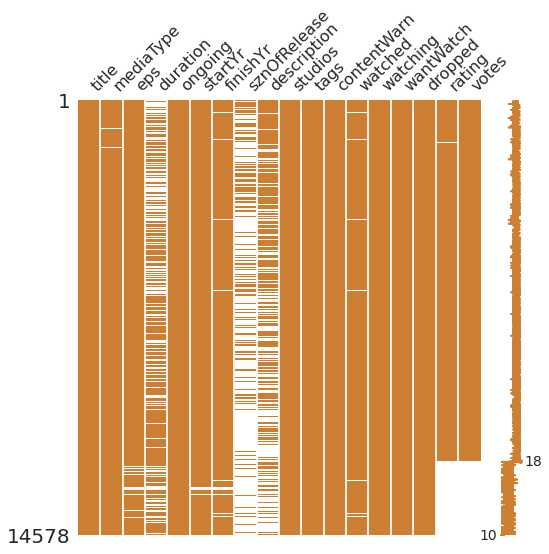

In [7]:
msno.matrix(df=df_anime.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

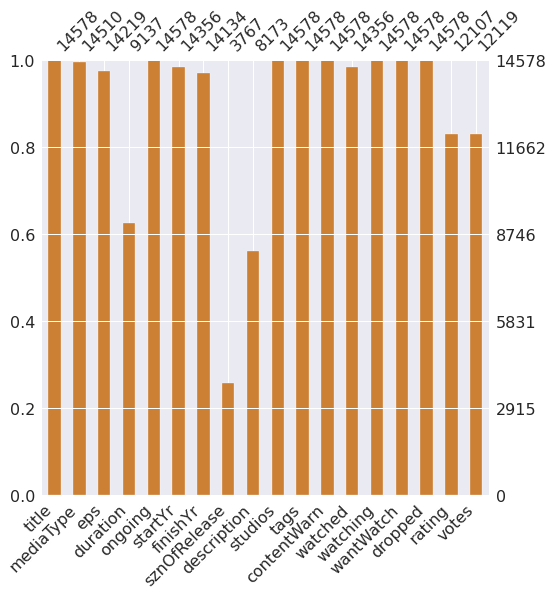

In [8]:
msno.bar(df=df_anime.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


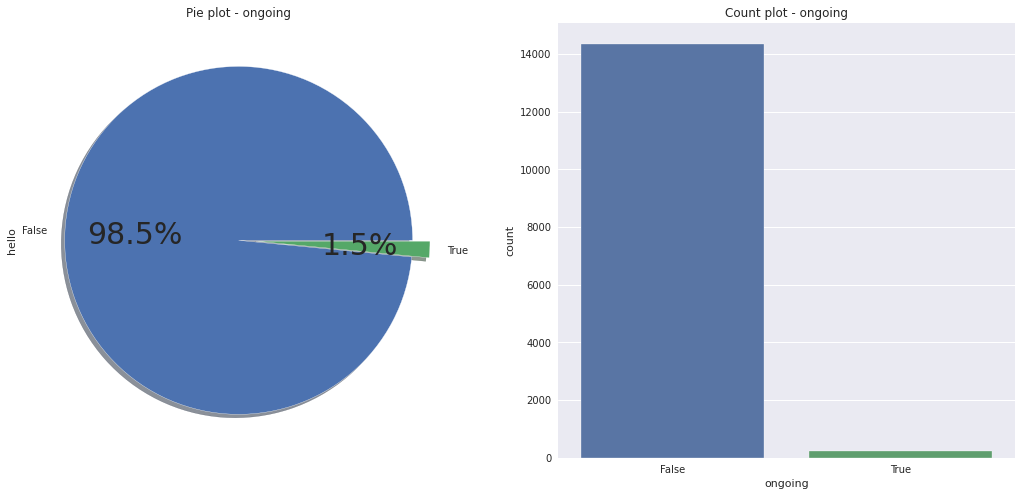

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_anime['ongoing'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - ongoing')
ax[0].set_ylabel('hello')
sns.countplot('ongoing', data=df_anime, ax=ax[1])
ax[1].set_title('Count plot - ongoing')

plt.show()

In [10]:
df_anime[['studios','watched']].groupby(['studios']).sum()

,watched
studios,
"['10GAUGE', 'Tatsunoko Production']",125.0
['10GAUGE'],168.0
['2:10 Animation'],259.0
"['3xCube', 'TMS Entertainment']",3790.0
['5th Avenue'],2908.0
...,...
['production doA'],3232.0
"['teamKG', 'Anpro']",2134.0
"['teamKG', 'Hoods Entertainment']",3459.0


In [11]:
df_anime[['ongoing','watched']].groupby(['ongoing'],as_index=True).sum()

,watched
ongoing,
False,34569871.0
True,0.0


In [12]:
df_anime[['ongoing','watching']].groupby(['ongoing'],as_index=True).sum()

,watching
ongoing,
False,2862648
True,242855


In [13]:
df_anime[['ongoing','watched']].groupby(['ongoing'],as_index=False).sum()

,ongoing,watched
0,False,34569871.0
1,True,0.0


In [14]:
df_anime['rating_band']=0

In [15]:
df_anime.loc[(df_anime['rating'] > 4.5) & (df_anime['rating'] <=5.0), 'rating_band'] = '4.5~5.0'
df_anime.loc[(df_anime['rating'] > 4.0) & (df_anime['rating'] <=4.5), 'rating_band'] = '4.0~4.5'
df_anime.loc[(df_anime['rating'] > 3.5) & (df_anime['rating'] <=4.0), 'rating_band'] = '3.5~4.0'
df_anime.loc[(df_anime['rating'] > 3.0) & (df_anime['rating'] <=3.5), 'rating_band'] = '3.0~3.5'
df_anime.loc[(df_anime['rating'] > 2.5) & (df_anime['rating'] <=3.0), 'rating_band'] = '2.5~3.0'
df_anime.loc[(df_anime['rating'] > 2.0) & (df_anime['rating'] <=2.5), 'rating_band'] = '2.0~2.5'
df_anime.loc[(df_anime['rating'] > 1.5) & (df_anime['rating'] <=2.0), 'rating_band'] = '1.5~2.0'
df_anime.loc[(df_anime['rating'] > 1.0) & (df_anime['rating'] <=1.5), 'rating_band'] = '1.0~1.5'
df_anime.loc[(df_anime['rating'] > 0.5) & (df_anime['rating'] <=1.0), 'rating_band'] = '0.5~1.0'
df_anime.loc[(df_anime['rating'] >= 0.0) & (df_anime['rating'] <=0.5), 'rating_band'] = '0.0~0.5'



In [16]:
df_anime.rating_band.value_counts().to_frame().style.background_gradient(cmap='summer_r')

,rating_band
0,2471
3.0~3.5,2342
2.5~3.0,2341
3.5~4.0,2136
2.0~2.5,2031
1.5~2.0,1413
4.0~4.5,1317
1.0~1.5,420
4.5~5.0,98
0.5~1.0,9


In [17]:
pd.crosstab(df_anime.rating_band,df_anime['watched'].value_counts(),margins=True).style.background_gradient(cmap='summer_r')
#watched 단위수 k명
#얜 따가사리 대신에아래껄로 

watched,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,27,28,29,30,31,32,34,36,37,43,45,46,47,50,51,52,55,59,60,63,67,71,76,77,81,84,85,88,91,93,96,97,99,100,116,117,123,124,126,128,131,133,139,161,170,183,188,200,375,All
rating_band,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,140,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,143
1.0~1.5,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27
1.5~2.0,91,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98
2.0~2.5,187,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,197
2.5~3.0,336,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,361
3.0~3.5,498,91,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,597
3.5~4.0,738,244,60,9,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1054
4.0~4.5,294,244,172,119,75,51,53,30,24,20,10,12,10,9,4,4,8,4,2,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1148
4.5~5.0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,1,3,1,2,4,9,3,2,3,2,2,1,3,2,1,1,1,3,1,2,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,2,2,1,2,1,1,98


<AxesSubplot:xlabel='rating_band'>

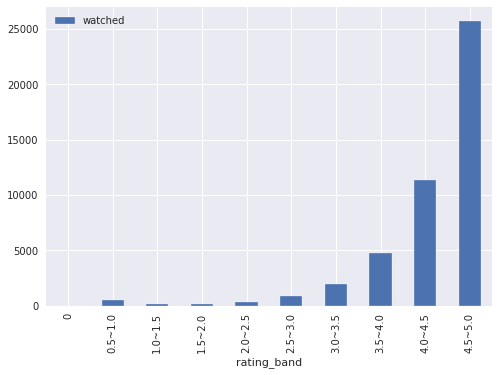

In [18]:
df_anime[['rating_band','watched']].groupby(['rating_band']).mean().plot.bar()
#오름차순 내림차순 정렬 굳이 필요 없으면 .sort_values(by='rating_band', ascending=False) 생략가능

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


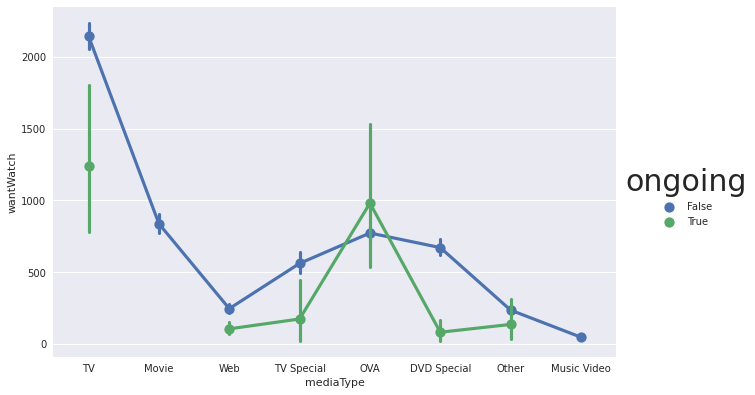

In [19]:
sns.factorplot('mediaType','wantWatch',hue='ongoing', data=df_anime, size=6, aspect=1.5)

In [20]:
print('평점 평균 : {:.1f} 점 (5점만점)'.format(df_anime['rating'].mean()))

평점 평균 : 2.9 점 (5점만점)


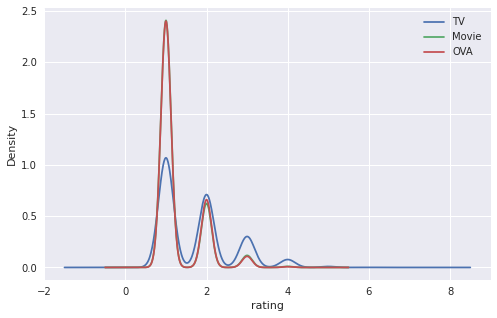

In [21]:
plt.figure(figsize=(8, 5))
df_anime['rating'][df_anime['mediaType'] == 'TV'].value_counts().plot(kind='kde')
df_anime['rating'][df_anime['mediaType'] == 'Movie'].value_counts().plot(kind='kde')
df_anime['rating'][df_anime['mediaType'] == 'OVA'].value_counts().plot(kind='kde')

plt.xlabel('rating')
plt.title('')
plt.legend(['TV', 'Movie', 'OVA'])
#이건 뭐지 